<a href="https://colab.research.google.com/github/arincons2/DIF_EQTN1b_FittingCurveFit/blob/main/DIF_EQTN1b_FittingCurveFit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.integrate import odeint
import matplotlib.pyplot as plt
# given data we want to fit
#tspan = [0, 0.1, 0.2, 0.4, 0.8, 1]
#Ca_data = [2.0081,  1.6,  1.7,  1,  0.5,  0.6] #[2.0081,  1.5512,  1.1903,  0.7160,  0.2562,  0.1495]



k fitted is: [2.44805283 1.38325012 0.53118474]
a is: 2.4480528256935323
b is: 1.383250120356103
c is: 0.531184742857378


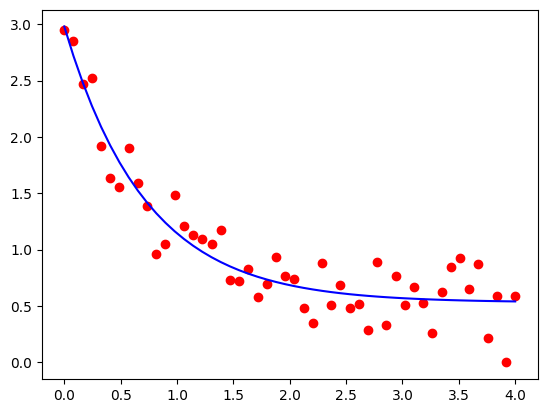

In [ ]:
def func(x, a, b, c):
    return a*np.exp(-b*x) + c

x = np.linspace(0,4,50)
y = func(x, 2.5, 1.3, 0.5)
yn = y + 0.2*np.random.normal(size=len(x))
popt, pcov = curve_fit(func, x, yn)

print('k fitted is:',popt)
a_ = popt[0]
b_ = popt[1]
c_ = popt[2]
print('a is:',a_)
print('b is:',b_)
print('c is:',c_)

tfit1 = np.linspace(0, 4);
fit1 = func(tfit1, a_, b_, c_)

plt.plot(x, yn, 'ro', label='data')
plt.plot(tfit1, fit1, 'b-', label='fit')
###plt.plot(tfit, fit, 'b-', label='fit')


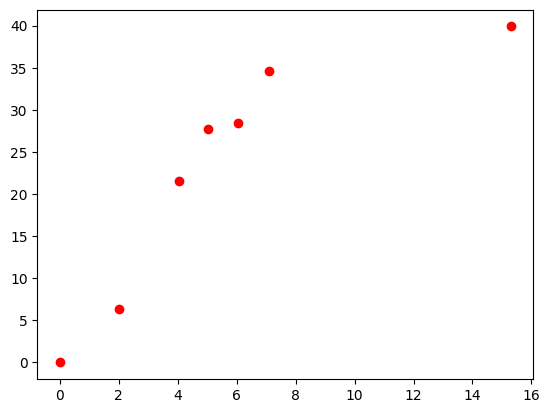

In [ ]:
tspan = [0, 2.0107383111, 4.0400284127, 5.0306689508, 6.0520202231, 7.0849036895, 15.3]
Ca_data = [0, 6.3868299001, 21.5060376885, 27.7675176534, 28.4835164835, 34.6273346425, 39.9]
plt.plot(tspan, Ca_data, 'ro', label='data')

In [ ]:

def fitfunc(t, k, k2):
    'Function that returns Ca computed from an ODE for a k'
    def myode(Ca, t):
        return -k * (Ca-k2)#**k2#1.0

    Ca0 = Ca_data[0]
    Casol = odeint(myode, Ca0, t)
    return Casol[:,0]

p0 = [1, 39]
k_fit, kcov = curve_fit(fitfunc, tspan, Ca_data, p0)
print('k fitted is:',k_fit)

k = k_fit[0]
k2 = k_fit[1]
##c_ = popt[2]
print('k is:',k)
print('k2 is:',k2)

tfit2 = np.linspace(0, 15.2);
fit2 = fitfunc(tfit2, k, k2)

#tfit = np.linspace(0, 7.1);
#fit = fitfunc(tfit, k_fit)



k fitted is: [ 0.16538602 45.17284242]
k is: 0.16538601642588915
k2 is: 45.17284242146137


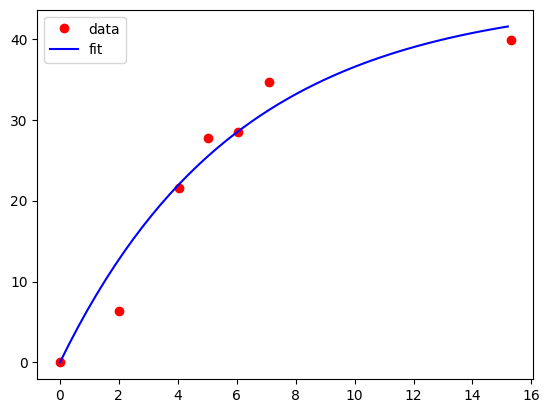

In [ ]:

plt.plot(tspan, Ca_data, 'ro', label='data')
plt.plot(tfit2, fit2, 'b-', label='fit')
plt.legend(loc='best')
#plt.savefig('images/ode-fit.png')